In [1]:
import getgrid
import solver
from PIL import Image

### Ouverture image

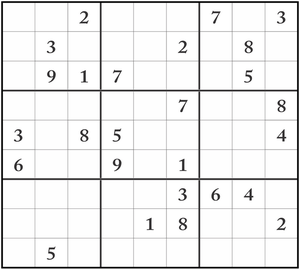

In [2]:
basewidth = 300
img = Image.open('sudoku_2.png')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img.resize((basewidth,hsize), Image.Resampling.LANCZOS)

### Reconnaissance de la grille

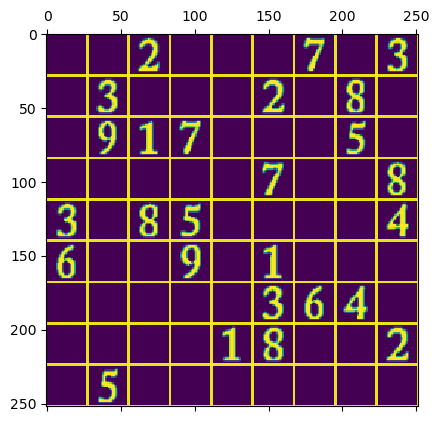

In [3]:
sudoku_grid = getgrid.get_grid('sudoku_2.png', display=True)

### Reconnaissance des chiffres

In [4]:
board = sudoku_grid.copy()

print('\nGrille à résoudre:\n')
solver.print_board(board)


Grille à résoudre:

0 0 2 | 0 0 0 | 7 0 3
0 3 0 | 0 0 2 | 0 8 0
0 9 1 | 7 0 0 | 0 5 0
- - - - - - - - - - - 
0 0 0 | 0 0 7 | 0 0 8
3 0 8 | 5 0 0 | 0 0 4
6 0 0 | 9 0 1 | 0 0 0
- - - - - - - - - - - 
0 0 0 | 0 0 3 | 6 4 0
0 0 0 | 0 1 8 | 0 0 2
0 5 0 | 0 0 0 | 0 0 0


In [104]:
from collections import Counter
import numpy as np

def valid_list(l):
    
    c = Counter(l)
    c.pop(0)
    if any(v != 1 for v in c.values()):
        return False
    return True

def check_solvabiliy(grid):
    
    # check rows
    for row in grid:
        if not valid_list(row):
            return False

    # check cols
    t_grid = grid.transpose()
    for row in t_grid:
        if not valid_list(row):
            return False
    
    #check boxes
    for i in range(0,9,3):
        for j in range(0,9,3):
            l = np.array([list(col[j:j+3]) for col in grid[i:i+3]]).flatten()
            if not valid_list(l):
                return False
            
    return True

### Résolution

In [5]:
if solver.check_solvability(board):
    solver.solve(board)
    print('\nSolution:\n')
    solver.print_board(board)
else:
    print('grille invalide')


Solution:

4 6 2 | 8 9 5 | 7 1 3
5 3 7 | 1 6 2 | 4 8 9
8 9 1 | 7 3 4 | 2 5 6
- - - - - - - - - - - 
9 2 5 | 3 4 7 | 1 6 8
3 1 8 | 5 2 6 | 9 7 4
6 7 4 | 9 8 1 | 3 2 5
- - - - - - - - - - - 
1 8 9 | 2 5 3 | 6 4 7
7 4 3 | 6 1 8 | 5 9 2
2 5 6 | 4 7 9 | 8 3 1
